# Entregável 1 - visão computacional
## Por: Amanda Rosa e Victor Vergara

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)  

OpenCV Version : 4.1.1 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

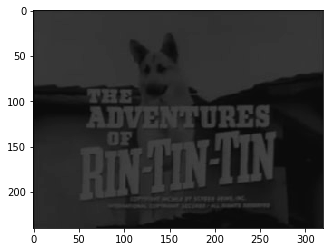

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

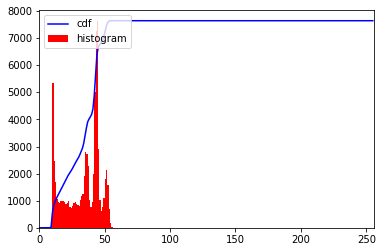

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

**1.**

O histograma fornecido não aproveita bem a faixa de cores, tendo em vista que ele usa uma faixa de tons de cores pequena, variando de 8 até 58. Desta forma, possui pouca variabilidade de tonalidades e assim tem pouco contraste.

**2.**

In [8]:
p = 255/rintin_gray.flatten().max()

In [9]:
saida = np.zeros((240,320), dtype=np.uint8)

for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = rintin_gray[i][j]*p

**3.**

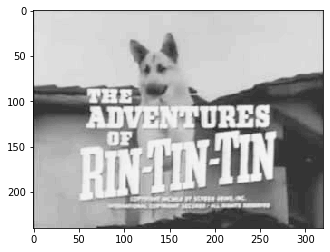

In [10]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


In [11]:
sala = cv2.imread("cena_canto_sala.jpg")
sala_rgb = cv2.cvtColor(sala, cv2.COLOR_BGR2RGB)


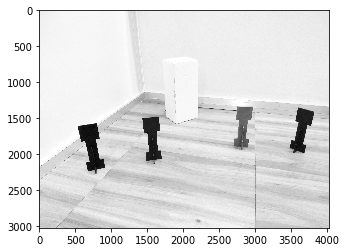

In [12]:
sala_r = sala_rgb[:,:,0]
plt.imshow(sala_r, cmap="Greys_r", vmin=0, vmax=255)

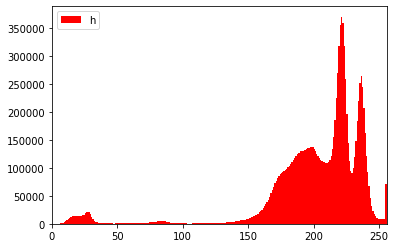

In [13]:
hist,bins = np.histogram(sala_r.flatten(),256,[0,256])

# cdf = hist.cumsum()
# cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(color = 'b')
plt.hist(sala_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('histogram'), loc = 'upper left')
plt.show()

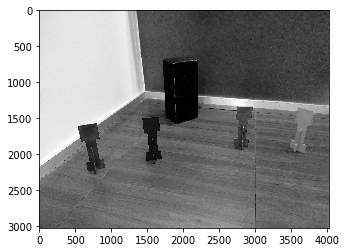

In [14]:
sala_b = sala_rgb[:,:,2]
plt.imshow(sala_b, cmap="Greys_r", vmin=0, vmax=255)

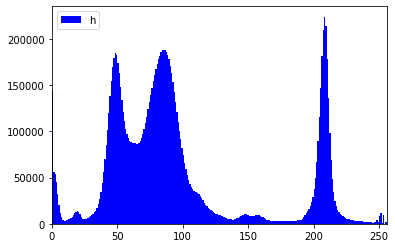

In [15]:
hist,bins = np.histogram(sala_b.flatten(),256,[0,256])

plt.plot(color = 'b')
plt.hist(sala_b.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('histogram'), loc = 'upper left')
plt.show()

In [16]:
saida = np.zeros((sala_rgb.shape[0], sala_rgb.shape[1]), dtype=np.uint8)

for i in range(sala_rgb.shape[0]):
    for j in range(sala_rgb.shape[1]):
        #saida[i][j] = imagem_gray[i][j]
        #if sala_rgb[i][j][0] >= 200 and sala_rgb[i][j][1] >= 50 and sala_rgb[i][j][1] <= 110 and sala_rgb[i][j][2] <= 20:
        if sala_rgb[i][j][0] >= 200 and sala_rgb[i][j][1] >= 50 and sala_rgb[i][j][1] <= 110 and sala_rgb[i][j][2] <= 20:
            saida[i][j] = 255

        else:
            saida[i][j] = 0

In [17]:
print(saida.max())

255


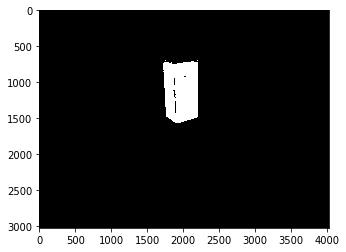

In [18]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

## 1. ##
Por meio do Histograma é possível identificar o creeper azul e a caixa vermelha tendo em vista o tamanho dos objetos na imagem e a suas intensidades de cor rgb, refletidos nos histogramas.

No primeiro histograma plotado, que diz respeito ao red, consegue-se observar que a "mancha" mais larga, que começa a crescer depois de 150, pode representar um objeto que ocupa um bom espaço, podendo ser o chão, que contém uma intensidade razoável de vermelho. Seguindo tal linha de raciocínio, conseguimos concluir que as ultimas barras, cujos eixo ordenado corresponde a menos de 100000 e o eixo horizontal mostra uma intensidade do vermelho de aproximadamente 255 pode ser a caixa vermelha. Ademais, consegue-se ver a caixa no histograma que avalia a cor azul, estando localizada nas primeiras barras, com baixíssima intensidade de azul.

O histograma que avalia o blue mostra também que o creeper é representado pelas ultimas pequenas barras, com grande intensidade de azul em comparação aos outros objetos representados na imagem.


# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [19]:

hall = cv2.imread("hall_box_battery_atividade3.png")
#hall = cv2.cvtColor(hall, cv2.COLOR_BGR2RGB)
hall_cinza = cv2.cvtColor(hall, cv2.COLOR_RGB2GRAY)

plt.imshow(hall_cinza)

error: OpenCV(4.1.1) /home/borg/404/scripts_robotica/OpenCV/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
plt.imshow(hall_cinza, cmap="Greys_r", vmin=0, vmax=255)

In [ ]:
saida = np.zeros((hall_cinza.shape[0], hall_cinza.shape[1]), dtype=np.uint8)
for i in range(hall_cinza.shape[0]):
    for j in range(hall_cinza.shape[1]):
        if j == 0 or j == hall.shape[1]-1:
            saida[i][j] = hall_cinza[i][j]
        else:
            saida[i][j] = abs(int(hall_cinza[i][j-1]) - int(hall_cinza[i][j+1]))
        if saida[i][j] < 0: 
            saida[i][j] = 0
        elif saida[i][j] > 255:
            saida[i][j] = 255

In [ ]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)